In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

from preprocessing import loadData

In [2]:
train_generator, validation_generator = loadData()

Found 3170 images belonging to 2 classes.
Found 791 images belonging to 2 classes.


## model

In [3]:
model = tf.keras.applications.MobileNetV2()

In [4]:
model.trainable = False
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [17]:
from keras import layers
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(512, activation='relu')(Flat_layer)
final_output = layers.Dropout(0.5)(final_output)
final_output = layers.Dense(1, activation='sigmoid')(final_output)

In [18]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [19]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [20]:
optimizer = keras.optimizers.Adam(0.0001)
new_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:
history = new_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
    shuffle=True
) 

Epoch 1/10
50/50 [==============================] - 74s 1s/step - loss: 6.0614 - accuracy: 0.8123 - val_loss: 1.2696 - val_accuracy: 0.8230
Epoch 2/10
50/50 [==============================] - 70s 1s/step - loss: 0.2050 - accuracy: 0.9514 - val_loss: 0.5288 - val_accuracy: 0.8306
Epoch 3/10
50/50 [==============================] - 70s 1s/step - loss: 0.1135 - accuracy: 0.9625 - val_loss: 0.5110 - val_accuracy: 0.7939
Epoch 4/10
50/50 [==============================] - 70s 1s/step - loss: 0.0907 - accuracy: 0.9703 - val_loss: 0.3814 - val_accuracy: 0.8635
Epoch 5/10
50/50 [==============================] - 70s 1s/step - loss: 0.0853 - accuracy: 0.9700 - val_loss: 0.6911 - val_accuracy: 0.7130
Epoch 6/10
50/50 [==============================] - 70s 1s/step - loss: 0.0777 - accuracy: 0.9685 - val_loss: 0.3895 - val_accuracy: 0.8432
Epoch 7/10
50/50 [==============================] - 69s 1s/step - loss: 0.0611 - accuracy: 0.9785 - val_loss: 0.5988 - val_accuracy: 0.7686
Epoch 8/10
50/50 [==

In [22]:
new_model.save('../models/mobileNet.h5', overwrite=True)

# plot acc

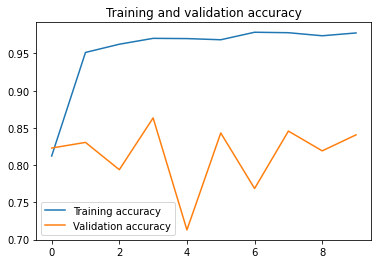

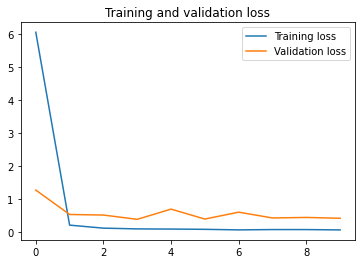

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()